## IS 310 Project

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [86]:
df = pd.read_csv("action_series.csv.zip", compression = 'zip')
df

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN
3,John Wick: Chapter 4,tt10366206,2023,"Action, Crime, Thriller","Director:, Chad Stahelski, | , Stars:, Kea...",John Wick uncovers a path to defeating The Hig...,8.0,169 min,R,195078,NaN
4,Fast X,tt5433140,2023,"Action, Adventure, Crime","Director:, Louis Leterrier, | , Stars:, Vi...",Dom Toretto and his family are targeted by the...,6.3,141 min,PG-13,39326,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11409,Everything Everywhere All at Once,tt6710474,2022,"Action, Adventure, Comedy","Directors:, Daniel Kwan, , Daniel Scheinert, |...",A middle-aged Chinese immigrant is swept up in...,7.8,139 min,R,451293,"72,861,480"
11410,House of the Dragon,tt11198330,2022–,"Action, Adventure, Drama","Stars:, Matt Smith, , Graham McTavish, , Steve...",An internal succession war within House Targar...,8.5,NaN,TV-MA,329111,NaN
11411,Guardians of the Galaxy,tt2015381,2014,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...",A group of intergalactic criminals must pull t...,8.0,121 min,PG-13,1220519,"333,176,600"
11412,The Witcher,tt5180504,2019–,"Action, Adventure, Drama","Stars:, Henry Cavill, , Freya Allan, , Anya Ch...","Geralt of Rivia, a solitary monster hunter, st...",8.1,60 min,TV-MA,519877,NaN


In [87]:
df['Gross Revenue'] = df['Gross Revenue'].replace('[\$,]', '', regex=True)
df['Gross Revenue'] = pd.to_numeric(df['Gross Revenue'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
df_clean = df[['Gross Revenue', 'Release Year', 'Rating']].dropna()

In [88]:
df_clean['Years_Since_Release'] = 2025 - df_clean['Release Year']
df_clean

,Gross Revenue,Release Year,Rating,Years_Since_Release
11,190241310.0,2018.0,8.4,7.0
32,718732821.0,2022.0,8.3,3.0
35,173202780.0,2021.0,5.2,4.0
37,659682302.0,2022.0,7.7,3.0
41,72861480.0,2022.0,7.8,3.0
...,...,...,...,...
11400,718732821.0,2022.0,8.3,3.0
11403,173202780.0,2021.0,5.2,4.0
11405,659682302.0,2022.0,7.7,3.0
11409,72861480.0,2022.0,7.8,3.0


In [89]:
df_clean['Log_Gross_Revenue'] = np.log1p(df_clean['Gross Revenue'])  # log(1 + x)
df_clean

,Gross Revenue,Release Year,Rating,Years_Since_Release,Log_Gross_Revenue
11,190241310.0,2018.0,8.4,7.0,19.063804
32,718732821.0,2022.0,8.3,3.0,20.393000
35,173202780.0,2021.0,5.2,4.0,18.969974
37,659682302.0,2022.0,7.7,3.0,20.307269
41,72861480.0,2022.0,7.8,3.0,18.104071
...,...,...,...,...,...
11400,718732821.0,2022.0,8.3,3.0,20.393000
11403,173202780.0,2021.0,5.2,4.0,18.969974
11405,659682302.0,2022.0,7.7,3.0,20.307269
11409,72861480.0,2022.0,7.8,3.0,18.104071


In [90]:
print("\n--- Descriptive Statistics ---")
print(df_clean.describe())


--- Descriptive Statistics ---
       Gross Revenue  Release Year       Rating  Years_Since_Release   
count   2.561000e+03   2561.000000  2561.000000          2561.000000  \
mean    8.289069e+07   2002.711831     6.365287            22.288169   
std     1.499040e+08     15.678600     1.100640            15.678600   
min     7.000000e+00   1923.000000     1.900000             3.000000   
25%     3.189220e+06   1993.000000     5.700000            10.000000   
50%     2.407820e+07   2006.000000     6.400000            19.000000   
75%     8.017213e+07   2015.000000     7.100000            32.000000   
max     9.366622e+08   2022.000000     9.000000           102.000000   

       Log_Gross_Revenue  
count        2561.000000  
mean           16.333641  
std             2.744115  
min             2.079442  
25%            14.975287  
50%            16.996817  
75%            18.199686  
max            20.657833  


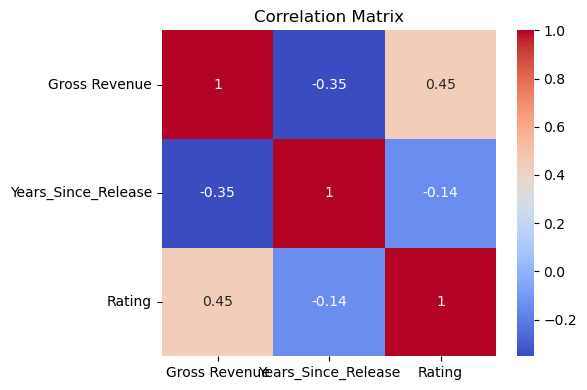

In [91]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_clean[['Gross Revenue', 'Years_Since_Release', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [92]:
X = df_clean[['Years_Since_Release', 'Rating']]
y = df_clean['Log_Gross_Revenue']  # use log-revenue


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [95]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



In [96]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [97]:
print("\n--- Regression Results (on log-scaled revenue) ---")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")



--- Regression Results (on log-scaled revenue) ---
Intercept: 16.3244
Coefficients: {'Years_Since_Release': -0.30967379641636156, 'Rating': 0.7828522236862656}
R² Score: 0.1241
Mean Squared Error: 6.6585


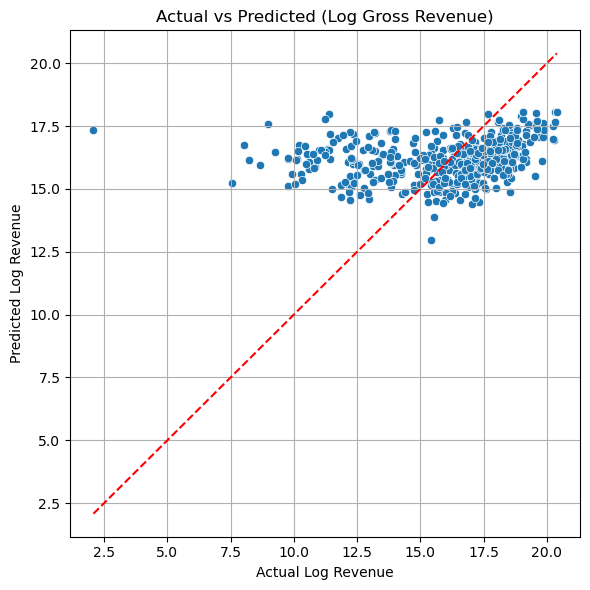

In [98]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Log Revenue')
plt.ylabel('Predicted Log Revenue')
plt.title('Actual vs Predicted (Log Gross Revenue)')
plt.grid(True)
plt.tight_layout()
plt.show()


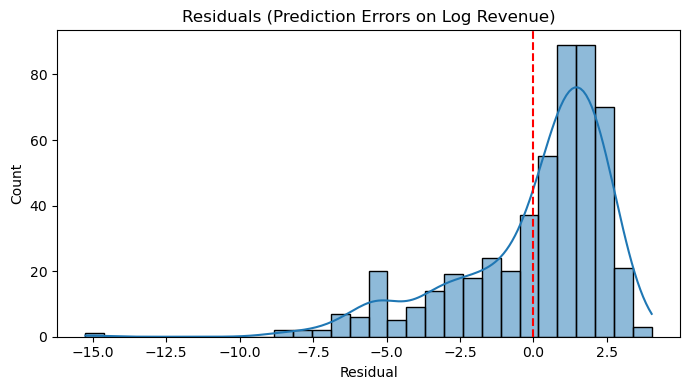

In [99]:
residuals = y_test - y_pred
plt.figure(figsize=(7, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residuals (Prediction Errors on Log Revenue)")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()


In [100]:
predicted_actual_revenue = np.expm1(y_pred)
true_actual_revenue = np.expm1(y_test)

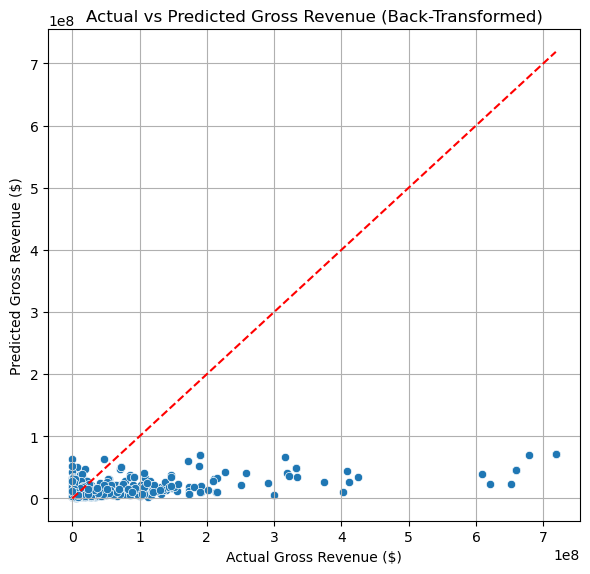

In [101]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=true_actual_revenue, y=predicted_actual_revenue)
plt.plot([true_actual_revenue.min(), true_actual_revenue.max()],
         [true_actual_revenue.min(), true_actual_revenue.max()], '--', color='red')
plt.xlabel("Actual Gross Revenue ($)")
plt.ylabel("Predicted Gross Revenue ($)")
plt.title("Actual vs Predicted Gross Revenue (Back-Transformed)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
df_clean['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce')
df_clean['Runtime'] = df['Runtime'].str.extract(r'(\d+)').astype(float)


In [104]:
df_clean_rf = df_clean.dropna(subset=['Number of Votes', 'Runtime'])


In [105]:
features = ['Years_Since_Release', 'Rating', 'Number of Votes', 'Runtime']
X_rf = df_clean_rf[features]
y_rf = np.log1p(df_clean_rf['Gross Revenue'])  # log target


In [106]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


In [107]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)
y_rf_pred = rf_model.predict(X_rf_test)

In [108]:
r2_rf = r2_score(y_rf_test, y_rf_pred)
mse_rf = mean_squared_error(y_rf_test, y_rf_pred)

In [109]:

print("\n--- Random Forest Regression Results (df_clean) ---")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")




--- Random Forest Regression Results (df_clean) ---
R² Score: 0.6125
Mean Squared Error: 2.9455


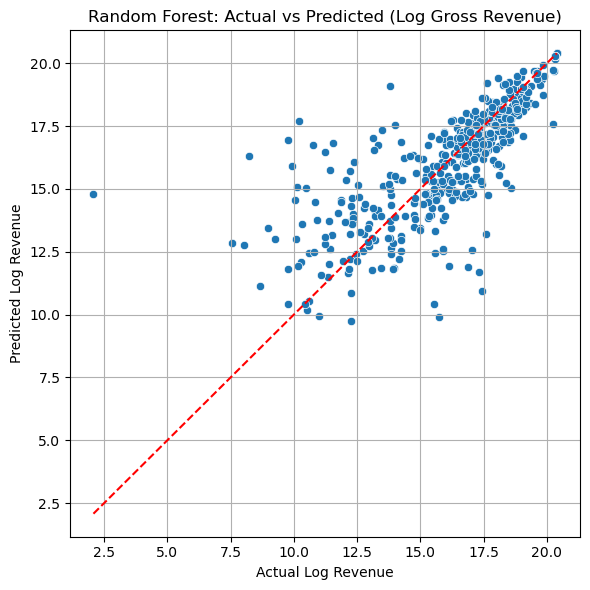

In [110]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_rf_test, y=y_rf_pred)
plt.plot([y_rf_test.min(), y_rf_test.max()], [y_rf_test.min(), y_rf_test.max()], '--', color='red')
plt.xlabel("Actual Log Revenue")
plt.ylabel("Predicted Log Revenue")
plt.title("Random Forest: Actual vs Predicted (Log Gross Revenue)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
actual_rf_dollars = np.expm1(y_rf_test)
predicted_rf_dollars = np.expm1(y_rf_pred)


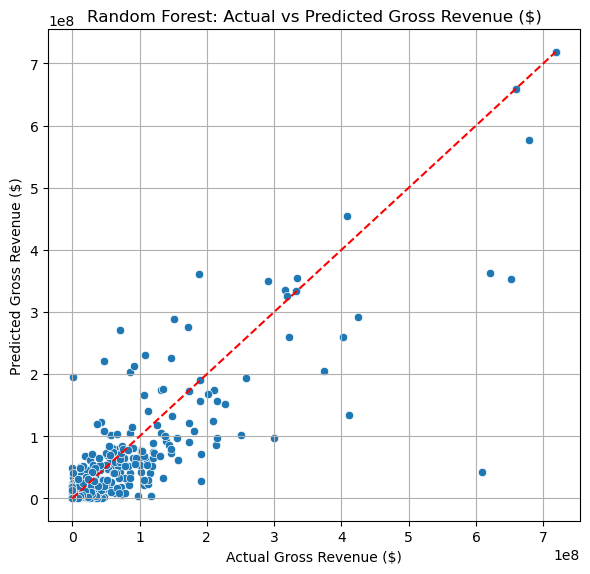

In [112]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=actual_rf_dollars, y=predicted_rf_dollars)
plt.plot([actual_rf_dollars.min(), actual_rf_dollars.max()],
         [actual_rf_dollars.min(), actual_rf_dollars.max()], '--', color='red')
plt.xlabel("Actual Gross Revenue ($)")
plt.ylabel("Predicted Gross Revenue ($)")
plt.title("Random Forest: Actual vs Predicted Gross Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [113]:
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)


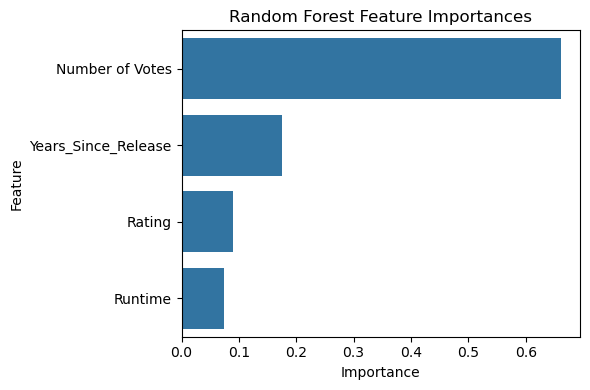

In [114]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()
